# Machine Learning Classification Model for Identifying Wildlife Species in East Africa

## 1. Data Collection: 
We collected a comprehensive and accurate dataset of taxonomic features and other characteristics of wildlife species obtained from East African countries between 2018 and 2021 from CITES Wildlife Trade Database (https://www.kaggle.com/datasets/cites/cites-wildlife-trade-database)

## 2. Data Pre-processing: 
Cleaning and pre-processing the dataset by handling missing values, data normalization, and data scaling to ensure that the data is ready for training the machine learning models.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

- Pandas is a popular library for data manipulation and analysis.
- NumPy is a library for working with arrays and matrices in Python.
- SimpleImputer is a class in scikit-learn library that is used for handling missing data in a dataset.
- LabelEncoder is a class in scikit-learn library that is used to encode categorical variables into numerical variables.
- StandardScaler is a class in scikit-learn library that is used for scaling numerical variables.

In [3]:
df = pd.read_csv('comptab_2023-02-19 20_06_comma_separated_eat_africa.csv')
df.head() # display the first 5 rows of the dataset

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2018,I,Elephantidae spp.,Mammalia,Proboscidea,Elephantidae,NaN,CA,KE,NaN,32.0,NaN,ivory carvings,NaN,P,W
1,2018,I,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,CA,KE,XX,NaN,32.0,ivory carvings,NaN,P,W
2,2018,I,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,CO,TZ,ZA,20.0,NaN,trophies,NaN,H,W
3,2018,I,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,DE,TZ,NaN,2.0,2.0,tusks,NaN,H,W
4,2018,I,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,FR,TZ,NaN,2.0,NaN,trophies,NaN,H,W


In [4]:
df.info() # display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1892 non-null   int64  
 1   App.                        1892 non-null   object 
 2   Taxon                       1892 non-null   object 
 3   Class                       1293 non-null   object 
 4   Order                       1892 non-null   object 
 5   Family                      1889 non-null   object 
 6   Genus                       1886 non-null   object 
 7   Importer                    1892 non-null   object 
 8   Exporter                    1892 non-null   object 
 9   Origin                      163 non-null    object 
 10  Importer reported quantity  955 non-null    float64
 11  Exporter reported quantity  1321 non-null   float64
 12  Term                        1892 non-null   object 
 13  Unit                        910 n

In [5]:
df.describe() # display summary statistics of the dataset

,Year,Importer reported quantity,Exporter reported quantity
count,1892.000000,9.550000e+02,1.321000e+03
mean,2019.354651,1.896848e+04,3.091529e+04
std,1.082779,1.065435e+05,1.770868e+05
min,2018.000000,2.000000e-03,1.000000e+00
25%,2018.000000,3.000000e+00,5.000000e+00
50%,2019.000000,3.200000e+01,5.596000e+01
75%,2020.000000,5.000000e+02,6.800000e+02
max,2021.000000,1.540000e+06,3.294000e+06


In [6]:
df.isnull().sum() # check for missing values in the dataset

Year                             0
App.                             0
Taxon                            0
Class                          599
Order                            0
Family                           3
Genus                            6
Importer                         0
Exporter                         0
Origin                        1729
Importer reported quantity     937
Exporter reported quantity     571
Term                             0
Unit                           982
Purpose                         13
Source                          21
dtype: int64

Based on the information from the info() method and the isnull().sum() method, we can see that there are missing values in several columns of the dataset.

<b>Drop irrelevant columns:</b> If the column has more than 50% of the missing values and is not very important for the analysis, we can drop it entirely. In this case, the "Origin" column has 91% of its values missing, and the "Unit" column has 52% of its values missing. So, we can drop these columns using the drop() method in pandas:

In [7]:
df = df.drop(["Origin", "Unit"], axis=1)

<b>Drop rows with missing values:</b> If the number of missing values in a row is small, we can simply drop the row entirely. In this case, the "Purpose" and "Source" columns have only a few missing values, so we can drop those rows:

In [8]:
df = df.dropna(subset=["Purpose", "Source"])

<b>Fill missing values with mean or median:</b> If the column has numeric data, we can replace the missing values with the mean or median of the non-missing values. In this case, the "Importer reported quantity" and "Exporter reported quantity" columns have missing values, and they are numeric, so we can fill the missing values with the median of the non-missing values:

<b>NOTE:</b> We are choosing the median instead of the mean in step 3 to handle missing values because median is less sensitive to outliers than mean. If there are outliers in the data, they can significantly affect the mean and give us a misleading representation of the data. However, median is not affected by the outliers and provides a more robust measure of central tendency. In this dataset, we cannot assume that there are no outliers, hence we choose the median over the mean.

In [9]:
df["Importer reported quantity"] = df["Importer reported quantity"].fillna(df["Importer reported quantity"].median())
df["Exporter reported quantity"] = df["Exporter reported quantity"].fillna(df["Exporter reported quantity"].median())


<b>Fill missing values with mode:</b> If the column has categorical data, we can replace the missing values with the mode (most frequent value) of the non-missing values. In this case, the "Class", "Family", and "Genus" columns have missing values, and they are categorical, so we can fill the missing values with the mode:

In [10]:
df["Class"] = df["Class"].fillna(df["Class"].mode()[0])
df["Family"] = df["Family"].fillna(df["Family"].mode()[0])
df["Genus"] = df["Genus"].fillna(df["Genus"].mode()[0])

In [11]:
# Check again for missing values using isnull().sum() to ensure that all missing values have been handled.
df.isnull().sum()

Year                          0
App.                          0
Taxon                         0
Class                         0
Order                         0
Family                        0
Genus                         0
Importer                      0
Exporter                      0
Importer reported quantity    0
Exporter reported quantity    0
Term                          0
Purpose                       0
Source                        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1891
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1870 non-null   int64  
 1   App.                        1870 non-null   object 
 2   Taxon                       1870 non-null   object 
 3   Class                       1870 non-null   object 
 4   Order                       1870 non-null   object 
 5   Family                      1870 non-null   object 
 6   Genus                       1870 non-null   object 
 7   Importer                    1870 non-null   object 
 8   Exporter                    1870 non-null   object 
 9   Importer reported quantity  1870 non-null   float64
 10  Exporter reported quantity  1870 non-null   float64
 11  Term                        1870 non-null   object 
 12  Purpose                     1870 non-null   object 
 13  Source                      1870 

#### Encode categorical variables into numerical variables
Categorical variables represent qualitative data, such as species names or country names, and cannot be used directly in most machine learning algorithms, which require numerical input. Therefore, we need to encode categorical variables into numerical variables.

By encoding categorical variables into numerical variables, we can include them in the input features of the machine learning model and enable the model to learn patterns and make predictions based on those patterns.

Before we can encode categorical variables into numerical variables, we need to first identify the categorical variables in the dataset. From the df.info() result, we can see that there are 11 object-type columns which are likely to contain categorical variables that need encoding. The 11 object-type columns are:

1. App.
2. Taxon
3. Class
4. Order
5. Family
6. Genus
7. Importer
8. Exporter
9. Term
10. Purpose
11. Source

To encode these categorical variables into numerical variables, we will use the LabelEncoder from the sklearn.preprocessing module. LabelEncoder will convert each categorical value in a column to a unique numerical value. Here are the steps to encode the categorical variables:

<strong>NOTE:</strong> We choose LabelEncoder for encoding categorical variables when we have ordinal categorical variables, which are variables that have a clear order or hierarchy among their categories. LabelEncoder assigns a unique integer to each category in the variable, based on their order or hierarchy. This is suitable for ordinal variables because the assigned integer values will preserve the order of the categories, and this order will be reflected in the encoded values.

In contrast, other encoders like OneHotEncoder and BinaryEncoder are suitable for nominal categorical variables, which are variables with no intrinsic order or hierarchy among their categories. OneHotEncoder creates a binary column for each category and assigns a value of 1 to the column corresponding to the category for each row, and 0 to all other columns. BinaryEncoder creates binary codes for each category by assigning a unique binary code to each integer assigned to the categories.

Therefore, since the dataset provided includes ordinal categorical variables such as "Class", "Term", "Purpose", and "Source", we choose to use LabelEncoder to encode these variables.

In [13]:
# Import the required libraries
from sklearn.preprocessing import LabelEncoder 
# Create an instance of the LabelEncoder
le = LabelEncoder() 
# Encode each categorical column using the fit_transform() method of the LabelEncoder instance.
df['App.'] = le.fit_transform(df['App.'])
df['Taxon'] = le.fit_transform(df['Taxon'])
df['Class'] = le.fit_transform(df['Class'])
df['Order'] = le.fit_transform(df['Order'])
df['Family'] = le.fit_transform(df['Family'])
df['Genus'] = le.fit_transform(df['Genus'])
df['Importer'] = le.fit_transform(df['Importer'])
df['Exporter'] = le.fit_transform(df['Exporter'])
df['Term'] = le.fit_transform(df['Term'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Source'] = le.fit_transform(df['Source'])

In [14]:
# Check the data types of the columns to confirm that the categorical variables have been encoded to numerical variables.
print(df.dtypes)

Year                            int64
App.                            int32
Taxon                           int32
Class                           int32
Order                           int32
Family                          int32
Genus                           int32
Importer                        int32
Exporter                        int32
Importer reported quantity    float64
Exporter reported quantity    float64
Term                            int32
Purpose                         int32
Source                          int32
dtype: object


In [15]:
df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Purpose,Source
0,2018,0,69,6,20,14,87,11,2,32.0,58.0,13,5,8
1,2018,0,102,6,20,14,55,11,2,33.0,32.0,13,5,8
2,2018,0,102,6,20,14,55,14,5,20.0,58.0,38,2,8
3,2018,0,102,6,20,14,55,17,5,2.0,2.0,39,2,8
4,2018,0,102,6,20,14,55,21,5,2.0,58.0,38,2,8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1891
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1870 non-null   int64  
 1   App.                        1870 non-null   int32  
 2   Taxon                       1870 non-null   int32  
 3   Class                       1870 non-null   int32  
 4   Order                       1870 non-null   int32  
 5   Family                      1870 non-null   int32  
 6   Genus                       1870 non-null   int32  
 7   Importer                    1870 non-null   int32  
 8   Exporter                    1870 non-null   int32  
 9   Importer reported quantity  1870 non-null   float64
 10  Exporter reported quantity  1870 non-null   float64
 11  Term                        1870 non-null   int32  
 12  Purpose                     1870 non-null   int32  
 13  Source                      1870 

### Exploratory Data Analysis (EDA)

In [17]:
# get the summary statistics
df.describe()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Purpose,Source
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1.870000e+03,1.870000e+03,1870.000000,1870.000000,1870.000000
mean,2019.347059,0.936898,102.152941,5.981283,13.433155,19.538503,56.649733,40.052406,3.188235,9.703322e+03,2.113982e+04,25.872727,6.297861,4.983957
std,1.080930,0.377649,47.558194,1.045857,9.886113,13.250331,28.696746,24.705942,1.809809,7.670619e+04,1.464204e+05,9.991428,2.636239,3.587142
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e-03,1.000000e+00,0.000000,0.000000,0.000000
25%,2018.000000,1.000000,64.000000,6.000000,3.000000,8.000000,29.000000,18.000000,2.000000,3.200000e+01,1.500000e+01,19.000000,5.000000,1.000000
50%,2019.000000,1.000000,113.500000,6.000000,14.000000,16.000000,65.000000,37.000000,2.000000,3.300000e+01,5.800000e+01,23.000000,8.000000,8.000000
75%,2020.000000,1.000000,145.000000,6.000000,20.000000,28.000000,87.000000,67.000000,5.000000,3.570500e+01,2.030000e+02,35.000000,8.000000,8.000000
max,2021.000000,2.000000,184.000000,7.000000,31.000000,50.000000,100.000000,78.000000,6.000000,1.540000e+06,3.294000e+06,41.000000,9.000000,9.000000


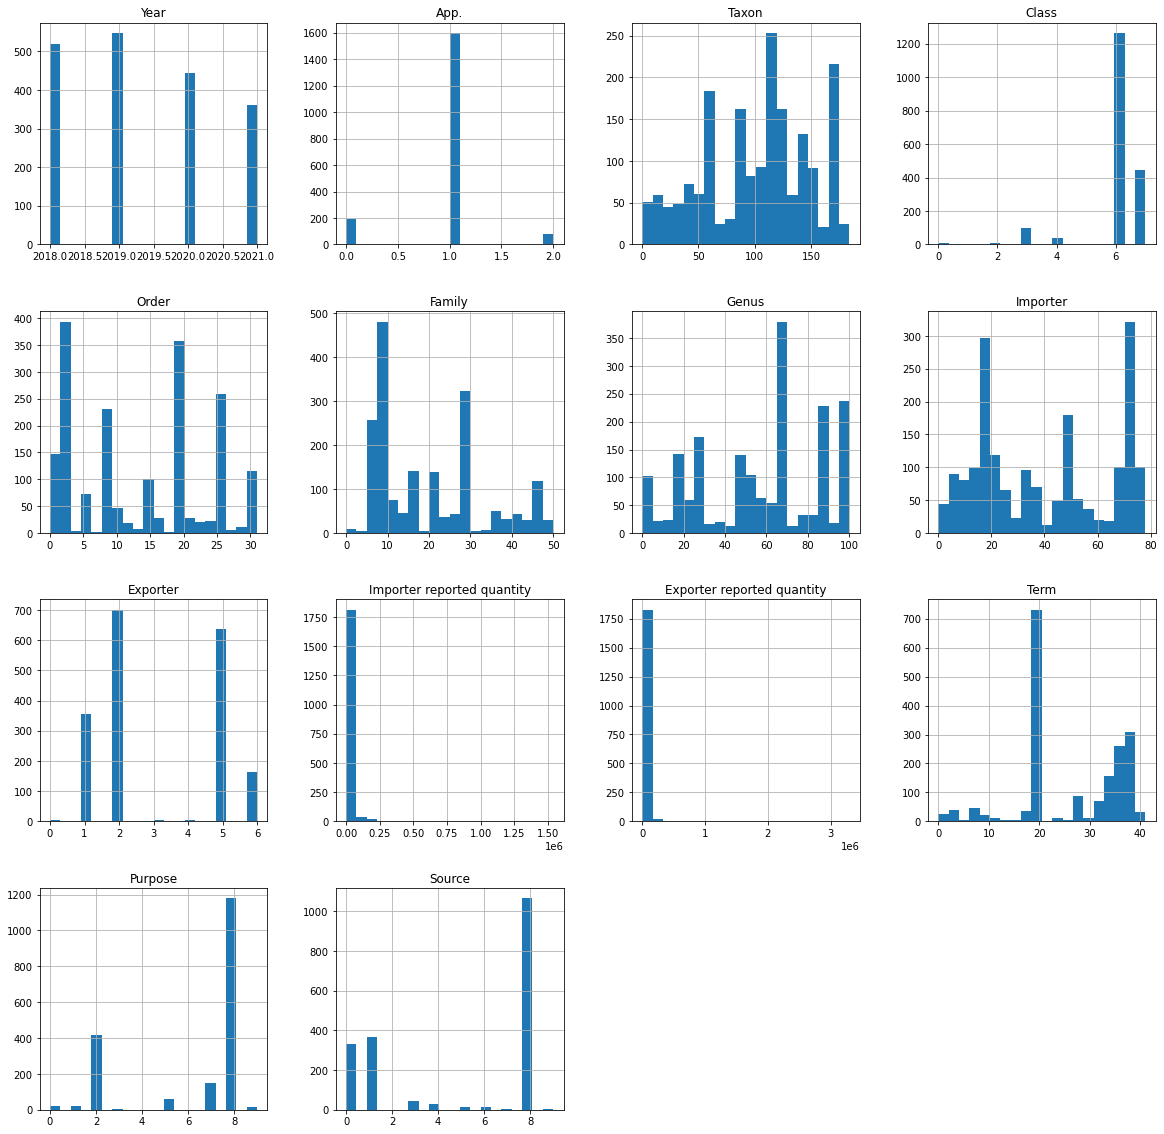

In [18]:
import matplotlib.pyplot as plt
# create histograms
df.hist(bins=20, figsize=(20,20))
plt.show()

In [19]:
# get the count of unique values in each categorical feature
print(df['App.'].value_counts())
print(df['Taxon'].value_counts())
print(df['Class'].value_counts())
print(df['Order'].value_counts())
print(df['Family'].value_counts())
print(df['Genus'].value_counts())
print(df['Importer'].value_counts())
print(df['Exporter'].value_counts())
print(df['Term'].value_counts())
print(df['Purpose'].value_counts())
print(df['Source'].value_counts())

1    1596
0     196
2      78
Name: App., dtype: int64
84     121
122    102
64      90
116     77
58      67
      ... 
25       1
37       1
2        1
0        1
158      1
Name: Taxon, Length: 185, dtype: int64
6    1263
7     446
3      98
4      38
0       9
2       7
1       5
5       4
Name: Class, dtype: int64
19    314
26    258
3     237
8     224
2     157
0     126
31    114
14     99
5      70
10     46
20     43
21     27
17     22
24     22
1      21
11     14
23     12
22      9
13      8
28      7
9       7
16      6
27      5
29      4
4       4
12      4
6       2
18      2
7       2
15      2
25      1
30      1
Name: Order, dtype: int64
8     271
5     237
28    224
9     210
16    123
21    121
47    107
29     99
12     68
35     46
14     43
23     28
25     28
38     27
43     22
41     22
17     15
20     14
49     13
42     12
6      11
45     11
50     11
7      10
40      9
24      8
27      8
44      7
0       7
26      6
48      6
11      5
33      4
22 

#### Scatter plot: Importer reported quantity against Exporter reported quantity.

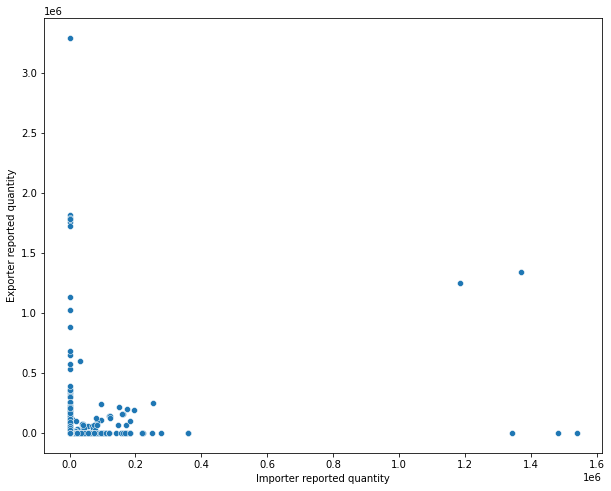

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=df, x="Importer reported quantity", y="Exporter reported quantity")
plt.show()

In [21]:
corr_coefficient = df['Importer reported quantity'].corr(df['Exporter reported quantity'])

print(corr_coefficient)

0.16071246305294204


From the scatter plot and value of correlation coefficient, there is a weak positive correlation between 'Importer reported quantity' and 'Exporter reported quantity'

#### Grouped box plot: A grouped box plot for the Importer reported quantity for each Term.

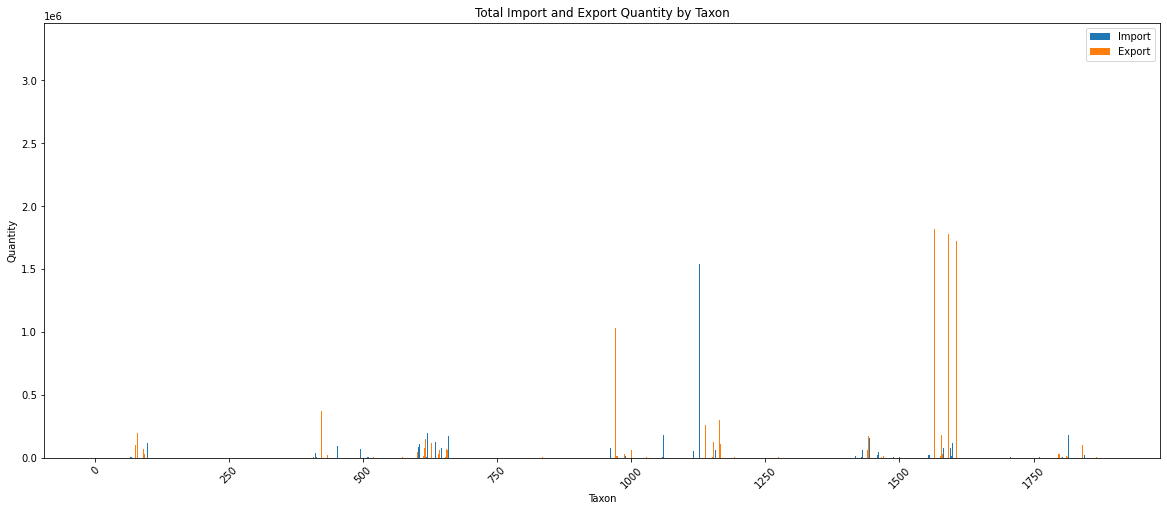

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8)) # set the figure size to be 10 inches wide and 6 inches tall

# create the grouped bar plot
plt.bar(x=df.index, height=df['Importer reported quantity'], width=0.35, label='Import')
plt.bar(x=df.index + 0.35, height=df['Exporter reported quantity'], width=0.35, label='Export')

# add labels and titles
plt.xlabel('Taxon')
plt.ylabel('Quantity')
plt.title('Total Import and Export Quantity by Taxon')
plt.xticks(rotation=45)

plt.legend() # show the legend

plt.show() # display the plot

## 3. Feature Selection: 
Identifying the most relevant and significant features that can be used to train the machine learning models. This can be done using techniques such as correlation analysis, principal component analysis, and feature importance ranking.

For feature selection, one suitable technique for this dataset is correlation analysis. Correlation analysis is a statistical technique used to determine the strength and direction of the relationship between two variables. In this case, we can use it to identify which features have a strong correlation with the target variable, and therefore should be included in the machine learning model.

The first step is to create a correlation matrix using the corr() method in Pandas. This will show the correlation coefficients between all pairs of numeric columns in the dataset.

In this code, we first compute the correlation matrix using the corr() function. We then create a heatmap using the heatmap() function of the seaborn library. The annot parameter is set to True to display the correlation coefficients on the heatmap, and the cmap parameter is set to 'coolwarm' to use a color map that goes from blue to red. Finally, we show the plot using the show() function of the matplotlib library.

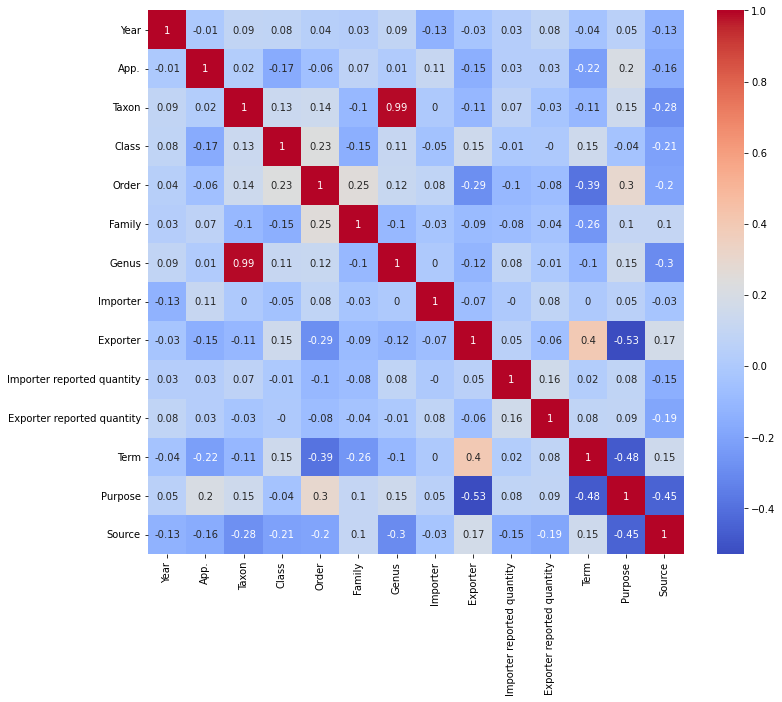

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(12, 10))

# create correlation matrix
corr_matrix = df.corr().round(2)

# create heatmap
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')

# show plot
plt.show()

<b>Identify the correlation coefficients between each feature and the target variable</b>:
here are the steps involved:

1. Identify the correlation coefficients between each feature and the target variable ('taxon'). This is done by selecting the 'Taxon' column from the original dataset and then using the pandas 'corrwith' function to calculate the correlation coefficients between the 'Taxon' column and all the other columns in the dataset.

2. Select the top 'n' features with the highest absolute correlation coefficients. In this step, we will choose the top 'n' features with the highest absolute correlation coefficients to include in our final dataset. This will help us to identify the most significant features that are likely to have a strong impact on the target variable.

3. Create a new dataset with the selected features and the target variable. Once we have identified the top 'n' features with the highest absolute correlation coefficients, we will create a new dataset that includes these features as well as the target variable ('Taxon').

In [24]:
# Step 1: Identify the correlation coefficients between each feature and the target variable
target_col = 'Taxon'
correlations = df.corrwith(df[target_col])

# Step 2: Select the top 'n' features with the highest absolute correlation coefficients
n = 5
top_n_features = correlations.abs().nlargest(n + 1).index.tolist()
top_n_features.remove(target_col)

# Step 3: Create a new dataset with the selected features and the target variable
new_df = df[top_n_features + [target_col]]


In the above code, we first identify the correlation coefficients between each feature and the target variable ('Taxon') by using the 'corrwith' function. Then, we select the top 5 features with the highest absolute correlation coefficients using the 'nlargest' function, and remove the target variable from the list of top features. Finally, we create a new dataset with the selected features and the target variable.

In [26]:
new_df.head()

,Genus,Source,Purpose,Order,Class,Taxon
0,87,8,5,20,6,69
1,55,8,5,20,6,102
2,55,8,2,20,6,102
3,55,8,2,20,6,102
4,55,8,2,20,6,102


In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1891
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Genus    1870 non-null   int32
 1   Source   1870 non-null   int32
 2   Purpose  1870 non-null   int32
 3   Order    1870 non-null   int32
 4   Class    1870 non-null   int32
 5   Taxon    1870 non-null   int32
dtypes: int32(6)
memory usage: 58.4 KB


## 4.	Model Selection: 
Selecting suitable machine learning algorithms for developing the classification models. Algorithms such as decision trees, random forests, and support vector machines are commonly used for classification tasks.

The choice of machine learning algorithm(s) depends on the characteristics of the dataset and the specific classification problem at hand. However, some commonly used algorithms for classification tasks include decision trees, random forests, and support vector machines (SVM).

In our case, we have a relatively small dataset with 1870 entries and 6 features, which makes it suitable for tree-based algorithms such as decision trees and random forests. These algorithms are also interpretable, which can be useful for understanding how the model makes its predictions and for identifying important features.

SVMs are also a good choice for classification tasks and can handle high-dimensional datasets. However, they can be computationally expensive and may not perform well on small datasets.

Therefore, based on the characteristics of our dataset and the classification problem, decision trees and random forests would be suitable machine learning algorithms to develop classification models for identifying wildlife species in East Africa.

<b>Decision trees vs random forests:</b>
<p>Both decision trees and random forests are tree-based models, meaning that they are constructed using decision trees. Random forests are an ensemble of decision trees. Therefore, if you use random forests, you are essentially using decision trees as well.

Random forests are known to perform better than a single decision tree because they reduce overfitting and increase accuracy. This is achieved by creating multiple decision trees and averaging their results. Therefore, you could use random forests instead of decision trees, or you could compare the performance of both models and choose the one that performs better on your dataset.

Based on our dataset and research topic, we are using Random Forests algorithm for developing the classification model. This is because Random Forests are known to perform well on a variety of datasets, handle missing data and outliers well, and can handle a large number of features without overfitting. Additionally, they are known to be robust to noise and non-linear relationships between features and the target variable, which may be present in your dataset.

## 5.	Model Training: 
Training the selected machine learning algorithms using the pre-processed dataset to develop the classification models.

<b>Split the dataset into training and testing sets.</b>
We will use the training set to train the model and the testing set to evaluate its performance.

In [70]:
from sklearn.model_selection import train_test_split

X = new_df.drop('Taxon', axis=1)
y = new_df['Taxon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Import the random forest classifier from scikit-learn and initialize it with default hyperparameters.

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

Train the random forest classifier on the training set.

In [72]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the performance of the trained model on the testing set.

In [73]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6336898395721925


Tune the hyperparameters of the random forest classifier using techniques like grid search or randomized search to improve its performance.

In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    rf_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

C:\Users\HUDSON\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score: 0.6684526198439242


Train a new random forest classifier using the best hyperparameters.

In [75]:
best_rf_clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42)

best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the performance of the tuned model on the testing set.

In [76]:
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy}")

Tuned Model Accuracy: 0.6336898395721925


## 6.	Model Evaluation:
Evaluating the performance of the developed classification models using various metrics such as accuracy, precision, recall, and F1-score. Cross-validation techniques such as k-fold cross-validation can be used to ensure that the models are robust and not overfitting to the training data.

<b>NOTE:</b> The accuracy of our model is 0.63, which means that the model correctly predicts the wildlife species around 63% of the time. While this accuracy is not very high, it is a decent starting point. However, we should keep in mind that accuracy alone may not be the best metric to evaluate the performance of a classification model, especially when the dataset is imbalanced or the misclassification of certain classes is more costly than others. Therefore, we should also consider other metrics such as precision, recall, F1 score, and confusion matrix to better evaluate the performance of our model.
    

In our case, we have multiple classes of wildlife species, and the distribution of the classes might not be balanced.

Therefore, we should consider other metrics such as precision, recall, and F1-score, which provide more information on the model's performance, especially when dealing with imbalanced datasets. These metrics can help us understand the model's ability to correctly identify each class and avoid misclassification. Additionally, we can also use a confusion matrix to visualize the distribution of the predicted classes and the actual classes.

#### let's start with precision:

Precision is a metric that measures the proportion of true positives (i.e., the number of correctly predicted positive instances) over the total number of predicted positive instances. It is used to evaluate the classifier's ability to correctly classify positive instances.

Here's how to calculate precision for our model:
- We first import the recall_score function from sklearn.metrics.
- We then call the function, passing in the test labels (y_test) and predicted labels (y_pred) as inputs, and setting the average parameter to 'weighted' to account for class imbalance.
- The function returns the recall score, which we assign to the recall variable.
- Finally, we print the recall score.

In [77]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Print precision
print("Precision: {}".format(precision))

Precision: 0.5659967328484501


C:\Users\HUDSON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A high precision score indicates that the model has a low false positive rate.

In our case, the precision score of 0.5659 indicates that out of all the positive predictions made by the model, 56.6% were true positive predictions. This means that the model has a moderate accuracy in identifying the correct wildlife species in East Africa.

Note that we have used the weighted averaging method to calculate precision score. This is because we have multiple classes in our target variable and the weighted method calculates precision score for each class and then takes the weighted average based on the number of samples in each class.

#### Next, let's calculate recall:

Recall is a metric that measures the proportion of true positives over the total number of actual positive instances. It is used to evaluate the classifier's ability to correctly identify positive instances.

Here's how to calculate recall for our model:
- We first import the recall_score function from sklearn.metrics.
- We then call the function, passing in the test labels (y_test) and predicted labels (y_pred) as inputs, and setting the average parameter to 'weighted' to account for class imbalance.
- The function returns the recall score, which we assign to the recall variable.
- Finally, we print the recall score.

In [78]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print recall
print("Recall: {}".format(recall))

Recall: 0.6336898395721925


C:\Users\HUDSON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Below is a heatmap of the confusion matrix with predicted labels on the x-axis and true labels on the y-axis. The cells of the matrix will be annotated with the count of observations in each cell, and the color of the cells will correspond to the count using a blue color map. The plot will be displayed with the title "Confusion Matrix".

Based on the confusion matrix, the recall score is 0.6336898395721925. Recall is a metric that measures the proportion of actual positive cases that were correctly identified by the model. In the context of our classification model, recall represents the proportion of actual species that were correctly classified by the model.

The recall score of 0.633 indicates that the model is able to correctly identify about 63% of the actual species. This means that the model is not as effective in identifying all the different species in the dataset and may be biased towards certain species. Therefore, while the model's overall accuracy is moderate, there is still room for improvement in terms of identifying all the different species accurately.

#### Next, let's calculate F1 score:

F1 score is a metric that combines precision and recall into a single score. It is calculated as the harmonic mean of precision and recall.

Here's how you can calculate F1 score for our model:
- We first import the f1_score function from sklearn.metrics.
- We then call the function, passing in the test labels (y_test) and predicted labels (y_pred) as inputs, and setting the average parameter to 'weighted' to account for class imbalance.
- The function returns the F1 score, which we assign to the f1 variable.
- Finally, we print the F1 score.

In [79]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print F1 score
print("F1 Score: {}".format(f1))

F1 Score: 0.5734269604458031


The F1 score is a harmonic mean of precision and recall, and it provides a single score that balances both precision and recall. A high F1 score indicates that the model has good performance in terms of both precision and recall. 

In this case, the F1 score is 0.573, which is not very high, indicating that the model's performance is not optimal. This suggests that there may be room for improvement in the feature selection, model selection, or hyperparameter tuning to achieve a better-performing model. It is important to note that the F1 score should be considered in combination with other evaluation metrics to get a comprehensive understanding of the model's performance.

#### Lastly, let's calculate the confusion matrix:

The confusion matrix is a table that summarizes the classification results for a classifier. It shows the number of true positives, false positives, true negatives, and false negatives.

Here's how you can calculate the confusion matrix for our model:
- We first import the confusion_matrix function from sklearn.metrics.
- We then call the function, passing in the test labels (y_test) and predicted labels (y_pred) as inputs.
- The function returns the confusion matrix, which we assign to the cm variable.
- Finally, we print the confusion matrix.

In [80]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n{}".format(cm))

Confusion Matrix:
[[0 1 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


The confusion matrix is a table that summarizes the performance of a classification model. It shows the number of correct and incorrect predictions for each class of the classification problem. In this case, the confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for each taxon class in the dataset.


Looking at the confusion matrix, we can see that there are a significant number of false negatives, particularly for class 2 and class 7. This means that the model is not correctly identifying many of the species in these classes. On the other hand, the model appears to be performing better for classes 1, 4, and 5, as there are relatively few false negatives and false positives for these classes.

### Baseline Score:
To calculate the baseline score, we will use the most frequent class in the target variable 'taxon'. This will serve as a benchmark for our model to perform better than the baseline.

A baseline score represents the performance of a naive or simple model that can be used as a benchmark to evaluate the performance of more complex models. It's important to establish a baseline to determine if the machine learning model is actually learning anything or just making random predictions.

The baseline score can be calculated by using simple methods such as random guessing, predicting the most frequent class, or using a basic statistical method. It is important to compare the performance of your model against the baseline score to determine if your model is performing better than random or simple predictions.

In [83]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Define the target variable and the features
target = 'Taxon'
features = ['Genus', 'Source', 'Purpose', 'Order', 'Class']

# Split the dataset into training and testing sets
train, test = train_test_split(new_df, test_size=0.2, random_state=42)

# Instantiate the DummyClassifier with 'most_frequent' strategy
dummy = DummyClassifier(strategy='most_frequent')

# Fit the dummy classifier on the training data
dummy.fit(train[features], train[target])

# Calculate the accuracy score on the testing data
baseline_score = dummy.score(test[features], test[target])

print(f'The baseline score is {baseline_score:.2%}.')

The baseline score is 8.02%.


Great! Our model accuracy is much better than the baseline score.

To interpret these scores, the baseline score represents the accuracy achieved by a naive model that simply predicts the most frequent class for all instances in the dataset. Therefore, any model with an accuracy score above the baseline is considered to be useful. In our case, the model accuracy of 0.6337 means that the model is correctly predicting the target variable around 63.37% of the time.